<a href="https://colab.research.google.com/github/vijayshankarrealdeal/GoogleColab/blob/main/FeedForward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [74]:
device = torch.device('cuda' if torch.cuda.is_available()else 'cpu')

In [75]:
train_dataset = MNIST(root = '.',train=True,download=True,transform=transforms.ToTensor())
test_dataset = MNIST(root = '.',train=False,download=True,transform=transforms.ToTensor())

In [76]:
class Model(nn.Module):
  def __init__(self,input_dim = 784,output_dim = 10,hidden_units = 64):
    super(Model,self).__init__()
    self.res = nn.Sequential(
        nn.Linear(input_dim,hidden_units),
        nn.ReLU(),
        nn.Linear(hidden_units,hidden_units*2),
        nn.ReLU(),
        nn.Linear(hidden_units*2,output_dim),
    )

  def forward(self,x):
    return self.res(x)

In [77]:
criterion = nn.CrossEntropyLoss()
model = Model().to(device)
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [78]:
model,device

(Model(
   (res): Sequential(
     (0): Linear(in_features=784, out_features=64, bias=True)
     (1): ReLU()
     (2): Linear(in_features=64, out_features=128, bias=True)
     (3): ReLU()
     (4): Linear(in_features=128, out_features=10, bias=True)
   )
 ), device(type='cuda'))

In [79]:
train_loader = DataLoader(dataset = train_dataset,batch_size = batch_size,shuffle=True)
test_loader = DataLoader(dataset = test_dataset,batch_size = batch_size,shuffle=False)

In [80]:
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

In [81]:
n_epochs = 10
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  train_loss = []
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)

    inputs = inputs.view(-1, 784)/255.0

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())

  train_loss = np.mean(train_loss) 
  
  test_loss = []
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1, 784)/255.0
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    test_loss.append(loss.item())
  test_loss = np.mean(test_loss)

  train_losses[it] = train_loss
  test_losses[it] = test_loss
    
  print(f'Epoch {it+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch 1/10, Train Loss: 0.7081, Test Loss: 0.3678
Epoch 2/10, Train Loss: 0.3213, Test Loss: 0.2806
Epoch 3/10, Train Loss: 0.2516, Test Loss: 0.2184
Epoch 4/10, Train Loss: 0.2097, Test Loss: 0.2005
Epoch 5/10, Train Loss: 0.1792, Test Loss: 0.1867
Epoch 6/10, Train Loss: 0.1560, Test Loss: 0.1460
Epoch 7/10, Train Loss: 0.1397, Test Loss: 0.1453
Epoch 8/10, Train Loss: 0.1285, Test Loss: 0.1321
Epoch 9/10, Train Loss: 0.1157, Test Loss: 0.1303
Epoch 10/10, Train Loss: 0.1095, Test Loss: 0.1361


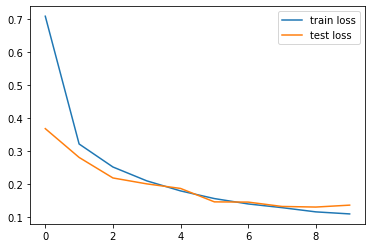

In [82]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [85]:
n_correct = 0.
n_total = 0.
for inputs, targets in train_loader:
  inputs, targets = inputs.to(device), targets.to(device)
  inputs = inputs.view(-1, 784)
  outputs = model(inputs)
  _, predictions = torch.max(outputs, 1)
  
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
  inputs, targets = inputs.to(device), targets.to(device)
  inputs = inputs.view(-1, 784)
  outputs = model(inputs)
  _, predictions = torch.max(outputs, 1)
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9340, Test acc: 0.9356


In [87]:
from sklearn.metrics import confusion_matrix
import itertools

In [89]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization
[[ 961    0    5    2    1    1    0    1    4    5]
 [   0 1035    9    8    0    1    1    3   78    0]
 [   4    2  968   37    2    0    1    8   10    0]
 [   0    1    4  990    0    1    0    6    8    0]
 [   5    0   10    2  915    0    7    7   12   24]
 [   8    0    8   29    4  791    1    4   40    7]
 [  15    0   12    2    1    8  895    1   23    1]
 [   2    0   12   43    1    0    0  951    4   15]
 [   2    0    3   18    1    4    2    3  941    0]
 [   4    3    1   25   17    1    0   10   39  909]]


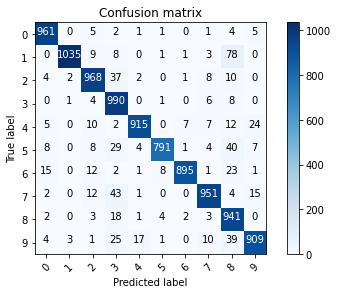

In [90]:
x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([])
for inputs, targets in test_loader:
  inputs = inputs.to(device)
  inputs = inputs.view(-1, 784)
  outputs = model(inputs)
  _, predictions = torch.max(outputs, 1)
  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

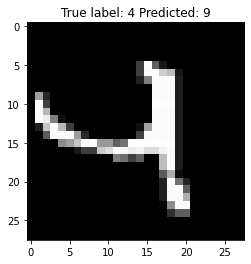

In [91]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], int(p_test[i])));